<h1 align='center'> 영상처리 프로그래밍 실습 9</h1>

<h6 align='right'> 2022. 5. 17. </h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:   &nbsp;&nbsp;          학번:    &nbsp;&nbsp;         학과(전공):
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 제출 마감: 5월 23일 (월) 오후 6:00까지 최종본을 SmartLEAD제출


In [1]:
import cv2
import matplotlib.pyplot as plt

import numpy as np
print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)

OpenCV version 4.5.2
NumPy version 1.20.3


## 지난 주 문제 1. 

다음 조건을 만족하는 함수 canny_edge_detection(filename) 함수를 작성하라.
- parameter로 주어진 영상 파일이 없으면 오류 메시지를 콘솔에 출력하고 종료한다.
- parameter로 주어진 영상 파일이 있으면 영상 파일을 읽고 원 영상과 cv2.Canny() 함수 실행 결과 영상을 나란히 표시한다.
- OpenCV의 trackbar 인터페이스를 통해서 cv2.Canny에 필요한 두 개의 thresholds를 조절한다.

In [7]:
from os.path import exists
def canny_edge_detection(filename):
    
    def onSetThreshold1(val):
        nonlocal th_low
        th_low = val
        canny()
        
    def onSetThreshold2(val):
        nonlocal th_high
        th_high = val
        canny()
    
    def canny():
        nonlocal img2, img_out
        img_Canny = cv2.Canny(img, th_low, th_high)
        img_out[...,0] = img_Canny
        img_out[...,1] = img_Canny
        img_out[...,2] = img_Canny
        img2 = np.hstack((img, img_out))
        cv2.imshow(winName, img2)


    if not exists(filename):
        print(f'{filename} does not exist.')
        return
    img = plt.imread(filename)
    winName = "Canny Edge Detection"
    cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL )
#    img_n = img.copy()
    kernel_type = 1
    img_out = np.zeros_like(img)
    
    th_low = 80
    th_high = 255
    img_Canny = cv2.Canny(img, th_low, th_high)
    img_out[...,0] = img_Canny
    img_out[...,1] = img_Canny
    img_out[...,2] = img_Canny
    img2 = np.hstack((img, img_out))

    cv2.imshow(winName, img2)

    cv2.createTrackbar('threshold 1', winName, th_low, 255, onSetThreshold1)
    cv2.createTrackbar('threshold 2', winName, th_high, 255, onSetThreshold2)
    cv2.setTrackbarMin('threshold 1', winName, 1)
    cv2.setTrackbarMin('threshold 2', winName, 1)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [8]:
canny_edge_detection('test.jpg')

test.jpg does not exist.


In [9]:
canny_edge_detection('plum_640.jpg')

## 예제 1.

'plum_640.jpg' 파읽을 읽어서, 원영상과 오른쪽으로 20 화소, 아래로 30화소 이동한 영상을 화면에 나란히 표시하라. 단, 스크린의 화소 하나에 영상의 화소 하나가 매칭되어야 한다.
단, 이동한 영상을 만들 때, cv2.warpAffine 함수를 사용하지 말아야 한다.

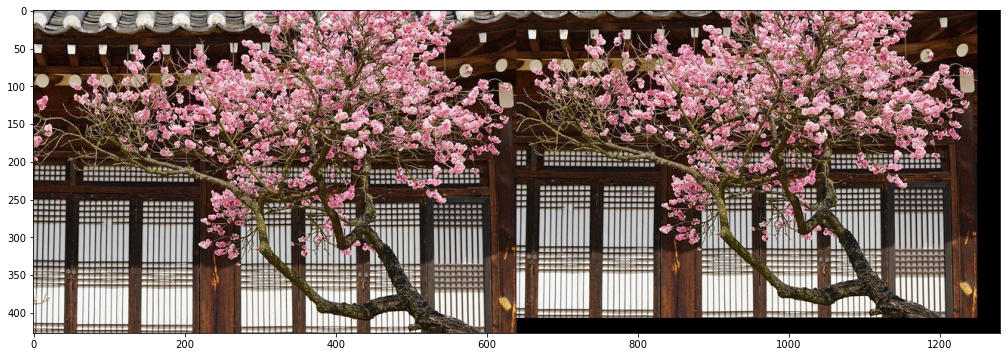

In [2]:
img = plt.imread('plum_640.jpg')

dst = np.zeros_like(img)
dx = -30
dy = -20

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        x_new = x + dx
        y_new = y + dy
        if (0 <= x_new < dst.shape[1]) and (0 <= y_new < dst.shape[0]):
            dst[y_new, x_new] = img[y, x]
            
img2 = np.hstack((img, dst), )


sf = 1 / plt.rcParams['figure.dpi']
plt.figure(figsize=(img2.shape[1]*sf, img.shape[0]*sf))
plt.imshow(img2)
plt.show()

## 예제 2.

cv2.warpAffine 함수를 사용하여 예제 1의 프로그램을 다시 작성하라.

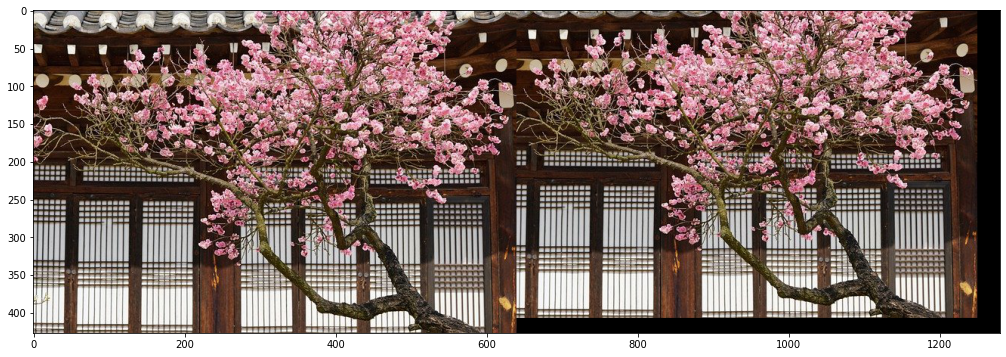

In [27]:
img = plt.imread('plum_640.jpg')

dst = np.zeros_like(img)
dx = -30
dy = -20
A = np.array([[1,0,dx], [0,1,dy]], float)   # float형으로 표현해줘야함
dst = cv2.warpAffine(img, A, (img.shape[1], img.shape[0]))
            
img2 = np.hstack((img, dst), )


sf = 1 / plt.rcParams['figure.dpi']
plt.figure(figsize=(img2.shape[1]*sf, img.shape[0]*sf))
plt.imshow(img2)
plt.show()

## 예제 3.


다음 조건을 만족하는 함수 geometric_transform(img) 함수를 작성하라.
- OpenCV의 trackbar 인터페이스를 통해서 가로 방향과 세로 방향의 shift 변수를 입력받고
- 평행이동이 반영된 결과 영상을 창에 표시한다.
- 단, trackbar로 입력받은 shift 변수의 범위는 다음과 같이 설정한다.
  - 가로 방향: $[-w, +w]$
  - 세로 방향: $[-h, +h]$
  - 여기에서 $w$와 $h$는 각각 영상의 높이와 폭이다.

In [23]:
def translate_transform(img):
    def onShiftH(val):
        nonlocal dx
        dx = val
        translation()
    def onShiftV(val):
        nonlocal dy
        dy = val
        translation()
        
    def translation():
        nonlocal img_out
        A = np.array([[1.,0,dx], [0,1,dy]]) 
        img_out = cv2.warpAffine(img, A, (img.shape[1], img.shape[0]))
        cv2.imshow(winName, img_out)
    
    winName = 'Translation'
    cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL)

    img_out = img.copy()
    dx = 0
    dy = 0
    cv2.imshow(winName, img_out)

    cv2.createTrackbar('Horizontal shift', winName, dx, img.shape[1], onShiftH)
    cv2.createTrackbar('Vertical shift', winName, dy, img.shape[0], onShiftV)
    cv2.setTrackbarMin('Horizontal shift', winName, -img.shape[1])
    cv2.setTrackbarMin('Vertical shift', winName, -img.shape[0])
    cv2.waitKey(0)
    cv2.destroyAllWindows()    

In [24]:
img = cv2.imread('plum_640.jpg')
translate_transform(img)

## 예제 4.

'plum_640.jpg' 파읽을 읽어서, 원영상과 시계 방향으로 30도 회전한 영상을 화면에 나란히 표시하라. 

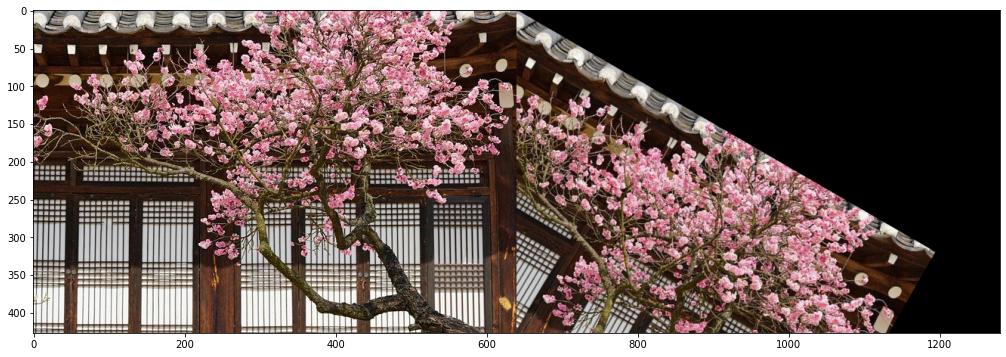

In [15]:
img = plt.imread('plum_640.jpg')

theta = -30
dst = np.zeros_like(img)
A = cv2.getRotationMatrix2D((0,0), theta, 1.0)
img_out = cv2.warpAffine(img, A, (img.shape[1], img.shape[0]))

img2 = np.hstack((img, img_out), )
sf = 1 / plt.rcParams['figure.dpi']
plt.figure(figsize=(img2.shape[1]*sf, img.shape[0]*sf))
plt.imshow(img2)
plt.show()

## 예제 5.

예제 4의 프로그램을 회전 중심을 영상의 중심으로 변경하여라.

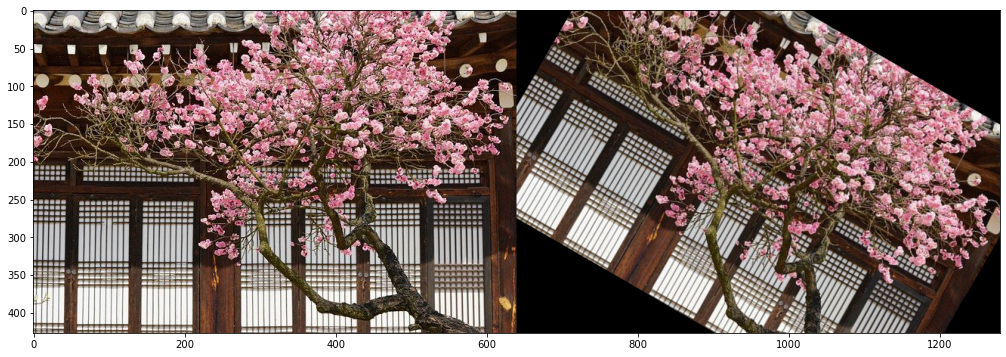

In [6]:
img = plt.imread('plum_640.jpg')

theta = -30
dst = np.zeros_like(img)
A = cv2.getRotationMatrix2D((img.shape[1]//2,img.shape[0]//2), theta, 1.0)
img_out = cv2.warpAffine(img, A, (img.shape[1], img.shape[0]))

img2 = np.hstack((img, img_out), )
sf = 1 / plt.rcParams['figure.dpi']
plt.figure(figsize=(img2.shape[1]*sf, img.shape[0]*sf))
plt.imshow(img2)
plt.show()

## 예제 6.

예제 5의 프로그램을 영상만 표시하는 것으로 수정하되, 회전한 영상에서 원 영상 전체가 보이도록 하라.

단, scipy의 ndimage.rotate를 사용하지 않아야 한다.


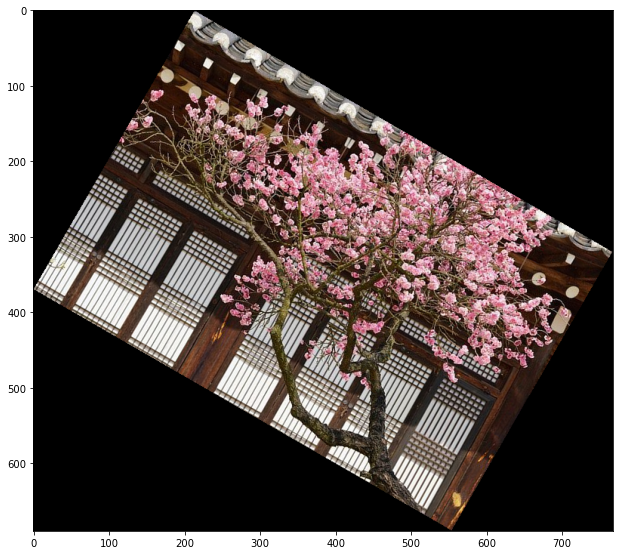

In [9]:
from scipy import ndimage
theta = -30
img = plt.imread('plum_640.jpg')
img_out = ndimage.rotate(img, theta)

sf = 1 / plt.rcParams['figure.dpi']
plt.figure(figsize=(img_out.shape[1]*sf, img_out.shape[0]*sf))
plt.imshow(img_out)
plt.show()

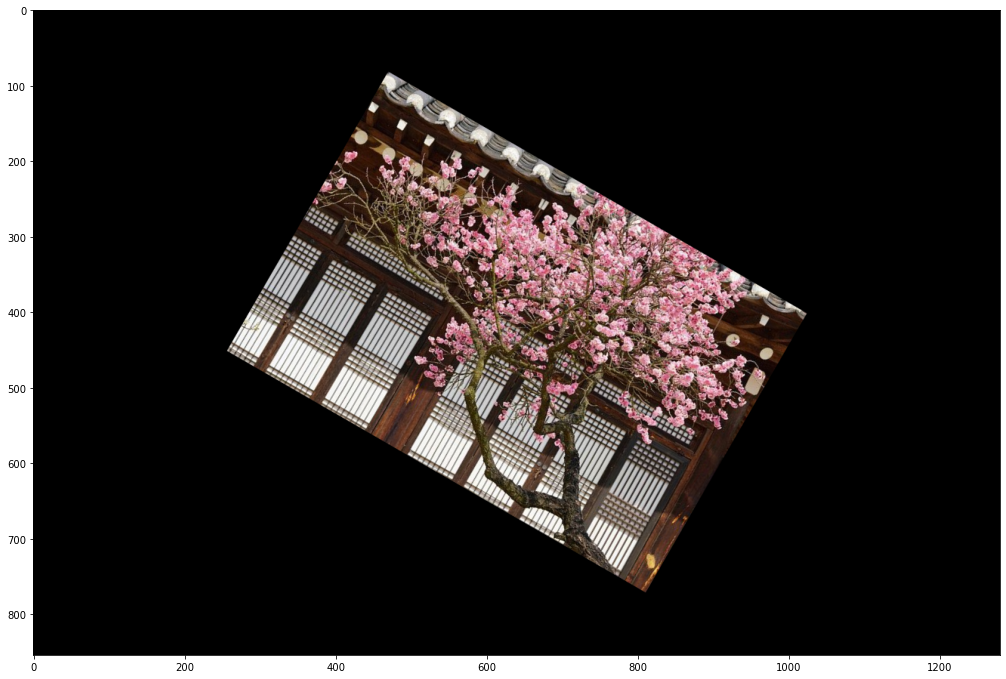

In [11]:
def get_extended_image(img, A):
    img_ex = np.zeros((img.shape[0]*2, img.shape[1]*2, 3), np.uint8)
    hq = img_ex.shape[0] // 4
    wq = img_ex.shape[1] // 4
    img_ex[hq:hq+img.shape[0], wq:wq+img.shape[1], ...] = img
    return img_ex
    
img = plt.imread('plum_640.jpg')
theta = -30

img_ex = get_extended_image(img, A)
C = (img_ex.shape[1]//2, img_ex.shape[0]//2)
A = cv2.getRotationMatrix2D(C, theta, 1.0)
img_out = cv2.warpAffine(img_ex, A, (img_ex.shape[1], img_ex.shape[0]))

sf = 1 / plt.rcParams['figure.dpi']
plt.figure(figsize=(img_out.shape[1]*sf, img_out.shape[0]*sf))
plt.imshow(img_out)
plt.show()

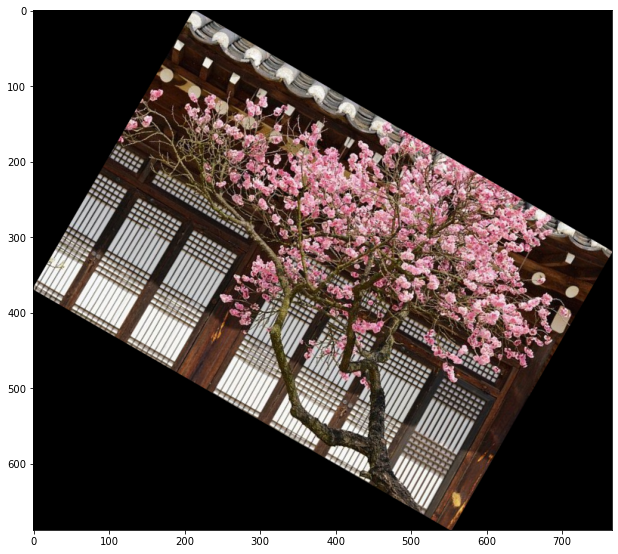

In [12]:
def get_extended_image(img, A):
    LU = np.array([0, 0, 1.])
    LD = np.array([0, img.shape[0]-1, 1.])
    RU = np.array([img.shape[1]-1, 0, 1.])
    RD = np.array([img.shape[1]-1, img.shape[0]-1, 1.])
    c = (img.shape[1]//2, img.shape[0]//2)
    
    # A만큼 회전한 결과
    LUT = A @ LU   
    LDT = A @ LD
    RUT = A @ RU
    RDT = A @ RD
    T = np.vstack((LUT, LDT, RUT, RDT))
    w, h = (T.max(0) - T.min(0)).round().astype(np.int32)

    img_ex = np.zeros((h, w, 3), np.uint8)
    c_new = (img_ex.shape[1]//2, img_ex.shape[0]//2)
    
    lm = c_new[0] - img.shape[1] // 2
    tm = c_new[1] - img.shape[0] // 2
    img_ex[tm:tm+img.shape[0], lm:lm+img.shape[1], ...] = img
    return img_ex
    
img = plt.imread('plum_640.jpg')
theta = -30

img_ex = get_extended_image(img, A)
C = (img_ex.shape[1]//2, img_ex.shape[0]//2)
A = cv2.getRotationMatrix2D(C, theta, 1.0)
img_out = cv2.warpAffine(img_ex, A, (img_ex.shape[1], img_ex.shape[0]))

sf = 1 / plt.rcParams['figure.dpi']
plt.figure(figsize=(img_out.shape[1]*sf, img_out.shape[0]*sf))
plt.imshow(img_out)
plt.show()

## 예제 7. 
가로 엇갈림 변환 (Shear transformation) 행렬은 다음과 같이 주어진다.

$${\displaystyle {\begin{bmatrix}x'\\y'\end{bmatrix}} ={\begin{bmatrix} 1 & c_x & 0 \\ c_y & 1 & 0 \end{bmatrix}} {\begin{bmatrix}x\\y\\1\end{bmatrix}}.}$$

$c_x$와 $c_y$를 변경하면서 변환 영상을 관찰하면서 이 변환의 원리를 설명해 보라.

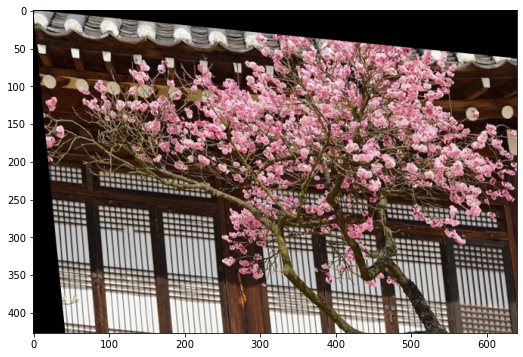

In [16]:
cx = 0.1
cy = 0.1
A = np.array([[1, cx, 0],[cy, 1, 0]])
img = plt.imread('plum_640.jpg')
img_out = cv2.warpAffine(img, A, (img.shape[1], img.shape[0]), 1.)

sf = 1 / plt.rcParams['figure.dpi']
plt.figure(figsize=(img_out.shape[1]*sf, img_out.shape[0]*sf))
plt.imshow(img_out)
plt.show()

## 예제 8. 
예제 7을 OpenCV의 trackBar interface를 이용해서 cx와 cy의 값을 변경하면서 원영상과 변환영상을 나란히 표시하라.
단, trackBar의 값의 범위는 $[-200, 200]$으로 하고, scale factor 0.01을 곱해서 실제 범위를 $[-2, 2]$로 설정하라.

In [17]:
def shear_transform(img):
    def onShiftH(val):
        nonlocal cx
        cx = val*0.01
        translation()
    def onShiftV(val):
        nonlocal cy
        cy = val*0.01
        translation()
        
    def translation():
        nonlocal img_out, img2
        A = np.array([[1, cx, 0],[cy, 1, 0]]) 
        img_out = cv2.warpAffine(img, A, (img.shape[1], img.shape[0]))
        img2 = np.hstack((img, img_out))
        cv2.imshow(winName, img2)
    
    img_out = img.copy()
    img2 = np.hstack((img, img_out))
    cx = 0
    cy = 0
    winName = 'Shear transformation'
    cv2.imshow(winName, img2)

    cv2.createTrackbar('Shift cx', winName, cx, 200, onShiftH)
    cv2.createTrackbar('Shift cy', winName, cy, 200, onShiftV)
    cv2.setTrackbarMin('Shift cx', winName, -200)
    cv2.setTrackbarMin('Shift cy', winName, -200)
    cv2.waitKey(0)
    cv2.destroyAllWindows()    

In [18]:
img = cv2.imread('plum_640.jpg')
shear_transform(img)

## 예제 9. 
'tallest_640.jpg' 파일을 읽고 이 사진에 있는 건물들을 정면에서 보는 효과를 얻도록 변환하라.

- opencv window 창을 이용하여 좌표값을 확인

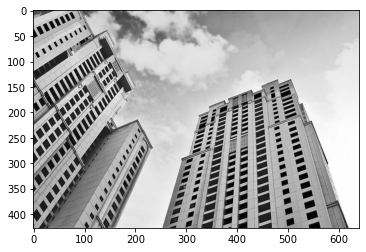

In [53]:
img = cv2.imread('tallest_640.jpg')
plt.imshow(img[...,::-1])

In [32]:
img.shape

(427, 640, 3)

In [65]:
img = cv2.imread('tallest_640.jpg')
cv2.imshow('test', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

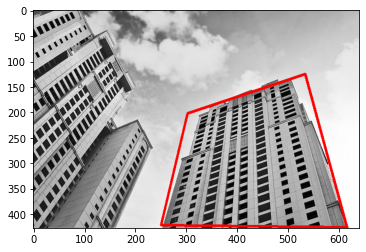

In [7]:
img = cv2.imread('tallest_640.jpg')
img2 = img.copy()
A = (303, 202)
B = (534, 125)
C = (616, 425)
D = (251, 421)
RED = (0, 0, 255)
pts1 = [A, B, C, D, A]
for n in range(4):
    cv2.line(img2, pts1[n], pts1[n+1], RED, 3)
    
plt.imshow(img2[...,::-1])
plt.show()

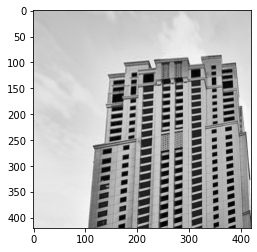

In [8]:
A2 = (100, 100)
B2 = (420, 100)
C2 = (420, 420) 
D2 = (100, 420)

src = np.float32([A,B,C,D])
dst = np.float32([A2,B2,C2,D2])

perspective_mat = cv2.getPerspectiveTransform(src, dst)
transformed = cv2.warpPerspective(img, perspective_mat, (420, 420))

plt.imshow(transformed)

### 문제 1. 
다음 조건을 만족하는 함수 perspective_projection_transform(img) 함수를 작성하라.

- 입력 영상과 perspective projection transform된 영상을 OpenCV의 윈도우에 나란히 표시한다
- 왼쪽 영상에 4 각형의 네 점의 위치를 다음 순서대로 마우스로 클릭하면 4 각형을 그린다.
- 사각형이 완성되면 perspective projection transform된 영상을 오른쪽에 표시한다.
- perspective projection transform 출력 영상의 크기는 입력 영상의 크기와 같다

In [20]:
def perspective_projection_transform(img):
    def onMouse(event, x, y, flags, param):
        nonlocal img_sq, img_pro, img2, pts_cnt, dst, pts
        if event == cv2.EVENT_LBUTTONUP:
            cv2.circle(img_sq, (x, y), 5, (0, 0, 255), -1)
            cv2.imshow(winName, img_sq)
            
            pts[pts_cnt] = [x, y]
            pts_cnt += 1
            
            if pts_cnt == 4:
                sm = pts.sum(axis=1)  # 4쌍의 좌표 각각 x+y 계산
                diff = np.diff(pts, axis=1)  # 4쌍의 좌표 각각 x-y 계산

                topLeft = pts[np.argmin(sm)]  # x+y가 가장 작은 값이 좌상단 좌표
                bottomRight = pts[np.argmax(sm)]  # x+y가 가장 큰 값이 우하단 좌표
                topRight = pts[np.argmin(diff)]  # x-y가 가장 작은 것이 우상단 좌표
                bottomLeft = pts[np.argmax(diff)]  # x-y가 가장 큰 값이 좌하단 좌표

                # 4개 좌표 
                pts1 = np.float32([topLeft, topRight, bottomRight, bottomLeft])
                
                pts2 = np.int32([topLeft, topRight, bottomRight, bottomLeft, topLeft])
                for n in range(4):
                    cv2.line(img_sq, pts2[n], pts2[n+1], (0, 0, 255), 3)
                
                perspective_mat = cv2.getPerspectiveTransform(pts1, dst)
                transformed = cv2.warpPerspective(img, perspective_mat, (img.shape[1], img.shape[0]))
                
                img2 = np.hstack((img_sq, transformed))
                cv2.imshow(winName, img2)

                
    
    
    img_sq = img.copy()
    img_pro = img.copy()
    img2 = np.hstack((img_sq, img_pro))
    
    A2 = (10, 10)
    B2 = (420, 10)
    C2 = (420, 420) 
    D2 = (10, 420)    
    dst = np.float32([A2,B2,C2,D2])
    
    pts = np.zeros((4, 2), dtype=np.float32)
    pts_cnt = 0
    
    winName = 'Perspective projection transformation'
    cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL)
    
    cv2.setMouseCallback(winName, onMouse)
    
    cv2.imshow(winName, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()  


In [21]:
img = cv2.imread('social-media_640.jpg')
perspective_projection_transform(img)

IndexError: index 4 is out of bounds for axis 0 with size 4